# Group Project - Aachen represent
## Linus Palm
## Date: 05/03/2023
___

## Import libraries
___

In [1]:
import tensorflow as tf
import os
import json
import shutil
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import cv2

2023-05-03 13:18:53.569415: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Prepare dataset
___

In [2]:
# count files in dataset

# start counting files at -1 because of hidden file created by image_dataset_from_directory method, set to 0 if next cell doesn't return 10000
samples = -1
for path in os.listdir('images'):
    samples += 1

# open file with attributes and skip header
file_in = open('list_attr_celeba.txt', 'r')
file_in.readline()
file_in.readline()

# collect gender attribute for every image in dict
annotations = {}
for _ in range(samples):
    line_list = file_in.readline().split()
    gender = "male" if line_list[21] == '1' else "female"
    annotations[line_list[0]] = gender

# create .json from dict
with open("annotations.json", "w") as outfile:
    json.dump(annotations, outfile)

file_in.close()

In [3]:
samples

10000

In [4]:
# create directory for dataset with one subdirectory for each class
!rm -r data/
os.mkdir('data/')
os.mkdir('data/male')
os.mkdir('data/female')

male_count = 0
female_count = 0

# sort copy images in correct subdirectory depending on class in .json and count elements per class
with open('annotations.json') as f:
    annotations = json.load(f)
    for k, v in annotations.items():
        if v == 'male':
            shutil.copy(f'images/{k}', f'data/male/{k}')
            male_count += 1
        else:
            shutil.copy(f'images/{k}', f'data/female/{k}')
            female_count += 1

print(male_count, female_count)

4217 5783


## Load dataset
___

In [5]:
# load dataset, use 80% for training and 20% for validation
train = tf.keras.utils.image_dataset_from_directory('data', subset='training',seed= 0, validation_split= .2)
val = tf.keras.utils.image_dataset_from_directory('data', subset='validation',seed= 0, validation_split= .2)

Found 10000 files belonging to 2 classes.
Using 8000 files for training.


2023-05-03 13:19:35.655794: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 10000 files belonging to 2 classes.
Using 2000 files for validation.


## Scale data
___

In [6]:
# scale values from range 0 to 255 down to range 0 to 1
train = train.map(lambda x, y: (x/255, y))
val = val.map(lambda x, y: (x/255, y))

## Build model
___

In [52]:
model = Sequential()

In [53]:
model.add(Conv2D(8, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(8, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(8, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [54]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 254, 254, 8)       224       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 127, 127, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 125, 125, 8)       584       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 62, 62, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 60, 60, 8)         584       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 30, 30, 8)       

## Train model
___

In [56]:
tf.keras.layers.BatchNormalization._USE_V2_BEHAVIOR = False
hist = model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
250/250 [==============================] - 92s 364ms/step - loss: 0.4018 - accuracy: 0.8166 - val_loss: 0.2682 - val_accuracy: 0.8985
Epoch 2/5
250/250 [==============================] - 92s 365ms/step - loss: 0.2235 - accuracy: 0.9121 - val_loss: 0.2143 - val_accuracy: 0.9120
Epoch 3/5
250/250 [==============================] - 91s 363ms/step - loss: 0.1740 - accuracy: 0.9321 - val_loss: 0.1888 - val_accuracy: 0.9240
Epoch 4/5
250/250 [==============================] - 91s 362ms/step - loss: 0.1352 - accuracy: 0.9498 - val_loss: 0.1789 - val_accuracy: 0.9305
Epoch 5/5
250/250 [==============================] - 91s 362ms/step - loss: 0.1171 - accuracy: 0.9563 - val_loss: 0.1798 - val_accuracy: 0.9310


## Plot performance
___

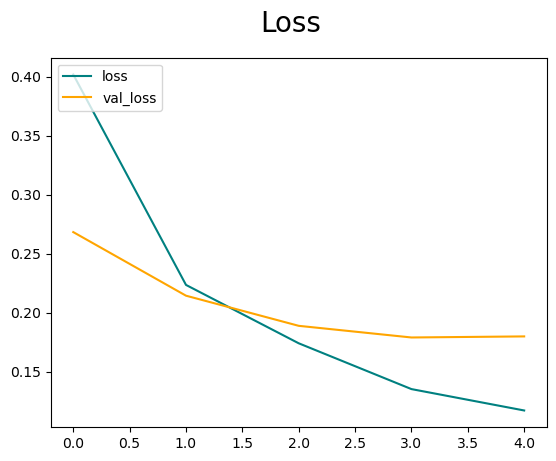

In [57]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

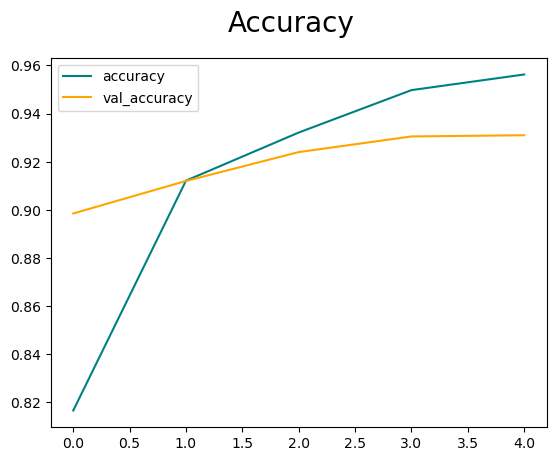

In [58]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Test model
___

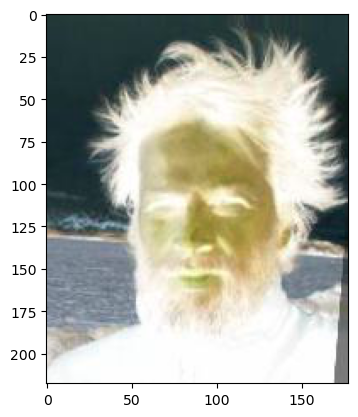

1/1 [==============================] - 0s 87ms/step
Female


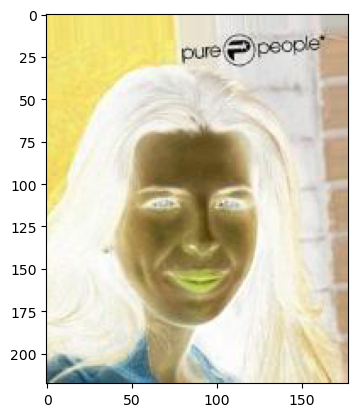

1/1 [==============================] - 0s 24ms/step
Female


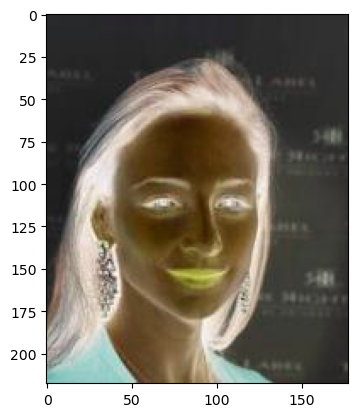

1/1 [==============================] - 0s 22ms/step
Female


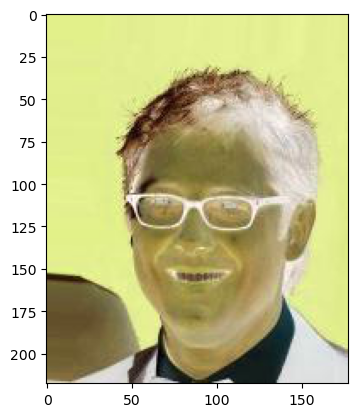

1/1 [==============================] - 0s 22ms/step
Male


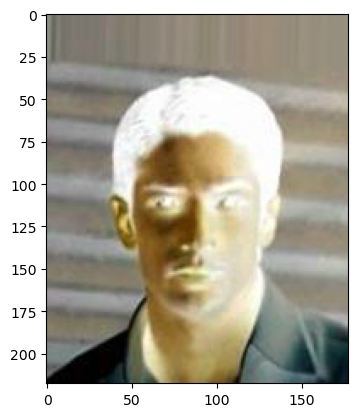

1/1 [==============================] - 0s 22ms/step
Male


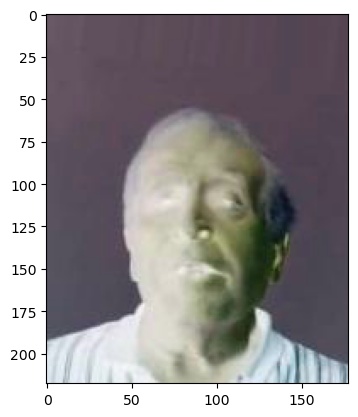

1/1 [==============================] - 0s 25ms/step
Female


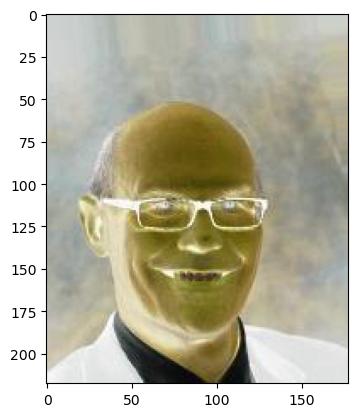

1/1 [==============================] - 0s 22ms/step
Male


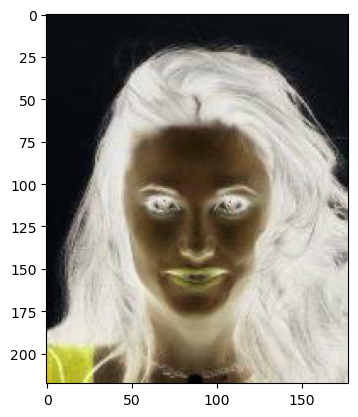

1/1 [==============================] - 0s 22ms/step
Female


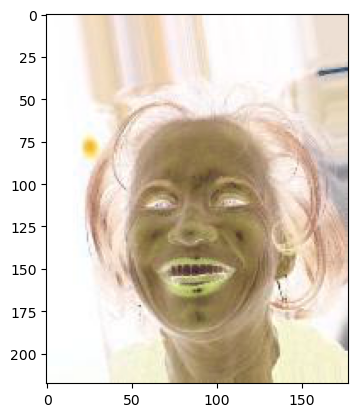

1/1 [==============================] - 0s 22ms/step
Male


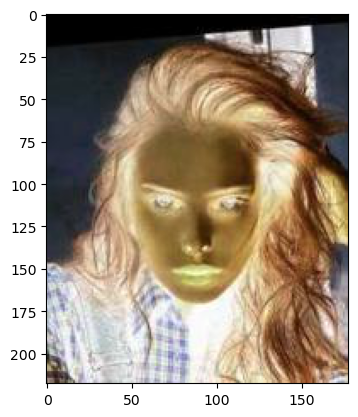

1/1 [==============================] - 0s 22ms/step
Female


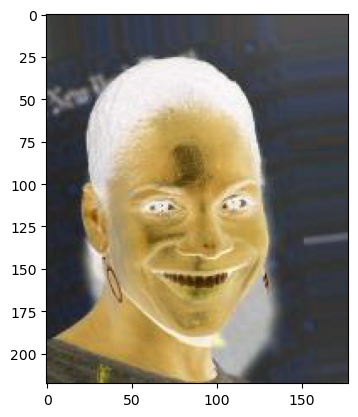

1/1 [==============================] - 0s 23ms/step
Female


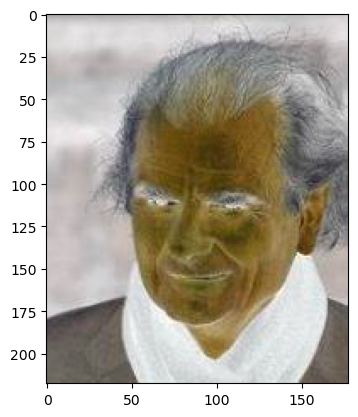

1/1 [==============================] - 0s 23ms/step
Female


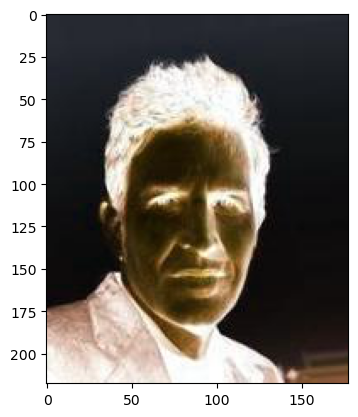

1/1 [==============================] - 0s 22ms/step
Male


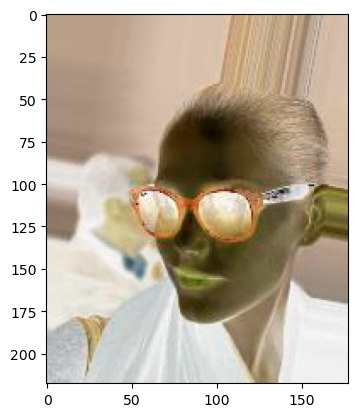

1/1 [==============================] - 0s 24ms/step
Female


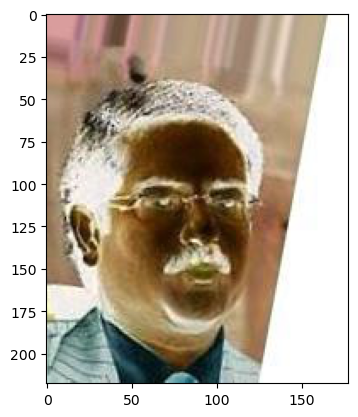

1/1 [==============================] - 0s 23ms/step
Male


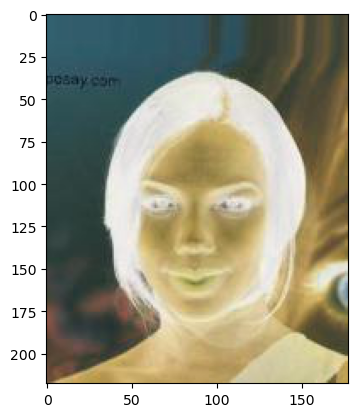

1/1 [==============================] - 0s 23ms/step
Female


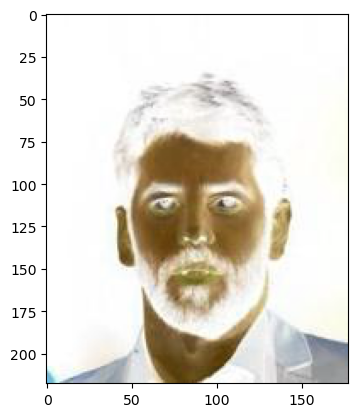

1/1 [==============================] - 0s 24ms/step
Male


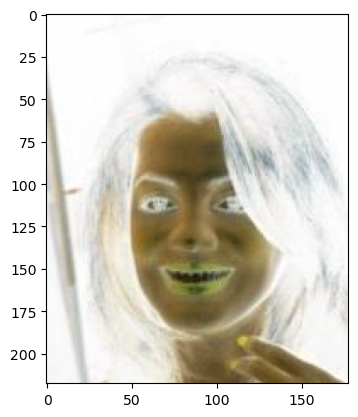

1/1 [==============================] - 0s 24ms/step
Female


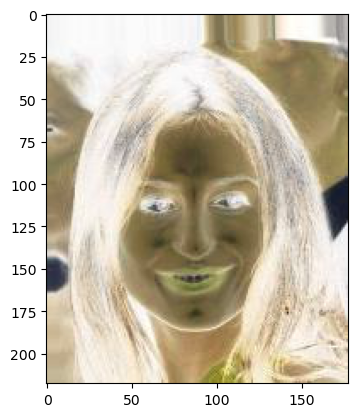

1/1 [==============================] - 0s 25ms/step
Female


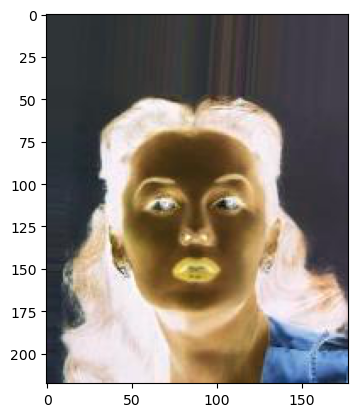

1/1 [==============================] - 0s 25ms/step
Female


In [59]:
# test model with 20 unseen pictures
for i in range(1, 21):
    img = cv2.imread(f'test/0{10000 + i}.jpg')
    plt.imshow(255 - img)
    plt.show()
    resize = tf.image.resize(img, (256,256))
    prediction = model.predict(np.expand_dims(resize/255, 0))
    if prediction > 0.5:
        print('Male')
    else:
        print('Female')

## Save model
___

In [60]:
# save model for use in application
model.save(os.path.join('models',f'gender_detection_{samples}.h5'))